In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Basics
import tensorflow as tf
import pandas as pd
import xarray as xr

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_score import *  # Load DRN_scores
from src.models.DRN.DRN_load_model import *  # Load Models
from src.models.DRN.DRN_train import *
from src.models.EMOS_local.EMOS_local_load_score import *  # Load EMOS_local_scores
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models#
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores

2023-06-21 10:40:01.547937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/anaconda3/lib/
2023-06-21 10:40:01.547956: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<IPython.core.display.Javascript object>

### 0. Setup

In [11]:
run = 0
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_0 = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [10]:
run = 1
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_1 = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: '/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_1.csv'

<IPython.core.display.Javascript object>

In [31]:
run = 2
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_2 = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [32]:
run = 3
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_3 = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [33]:
run = 4
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_3 = pd.read_csv(path)

<IPython.core.display.Javascript object>

### 1. Functions

In [4]:
def df_split_lead(df):
    return [
        df.loc[df["lead_time"] == 0],
        df.loc[df["lead_time"] == 15],
        df.loc[df["lead_time"] == 30],
    ]

<IPython.core.display.Javascript object>

In [5]:
df_DRN_hyper_split_0 = df_split_lead(df_DRN_hyper_scores_0)
# df_DRN_hyper_split_1 = df_split_lead(df_DRN_hyper_scores_1)
# df_DRN_hyper_split_2 = df_split_lead(df_DRN_hyper_scores_2)
# df_DRN_hyper_split_3 = df_split_lead(df_DRN_hyper_scores_3)

<IPython.core.display.Javascript object>

#### Run 0

In [16]:
df_DRN_hyper_split_0[0].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
41,0,"[64, 32]",5,1024,30,0.001,Adam,relu,0.391223
50,0,"[64, 32]",10,1024,30,0.001,Adam,relu,0.391784
5,0,[256],5,1024,30,0.001,Adam,relu,0.392277
14,0,[256],10,1024,30,0.001,Adam,relu,0.392297
32,0,[512],10,1024,30,0.001,Adam,relu,0.392469
23,0,[512],5,1024,30,0.001,Adam,relu,0.392554
17,0,[256],10,2048,30,0.001,Adam,relu,0.392646
35,0,[512],10,2048,30,0.001,Adam,relu,0.392879
44,0,"[64, 32]",5,2048,30,0.001,Adam,relu,0.393125
8,0,[256],5,2048,30,0.001,Adam,relu,0.393225


<IPython.core.display.Javascript object>

In [17]:
df_DRN_hyper_split_0[1].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
80,15,[512],5,2048,30,0.001,Adam,relu,1.103386
89,15,[512],10,2048,30,0.001,Adam,relu,1.106169
71,15,[256],10,2048,30,0.001,Adam,relu,1.109336
62,15,[256],5,2048,30,0.001,Adam,relu,1.109618
70,15,[256],10,2048,30,0.005,Adam,relu,1.117604
107,15,"[64, 32]",10,2048,30,0.001,Adam,relu,1.127908
77,15,[512],5,1024,30,0.001,Adam,relu,1.136670
97,15,"[64, 32]",5,2048,30,0.005,Adam,relu,1.142306
55,15,[256],5,512,30,0.005,Adam,relu,1.142515
60,15,[256],5,2048,30,0.010,Adam,relu,1.143295


<IPython.core.display.Javascript object>

In [18]:
df_DRN_hyper_split_0[2].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
150,30,"[64, 32]",5,2048,30,0.010,Adam,relu,1.454142
149,30,"[64, 32]",5,1024,30,0.001,Adam,relu,1.454642
156,30,"[64, 32]",10,1024,30,0.010,Adam,relu,1.458116
112,30,[256],5,1024,30,0.005,Adam,relu,1.460081
142,30,[512],10,2048,30,0.005,Adam,relu,1.461242
147,30,"[64, 32]",5,1024,30,0.010,Adam,relu,1.461641
151,30,"[64, 32]",5,2048,30,0.005,Adam,relu,1.462537
127,30,[512],5,512,30,0.005,Adam,relu,1.467402
159,30,"[64, 32]",10,2048,30,0.010,Adam,relu,1.467601
158,30,"[64, 32]",10,1024,30,0.001,Adam,relu,1.472441


<IPython.core.display.Javascript object>

In [9]:
df_DRN_hyper_split_0[0]

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
0,0,[256],5,512,30,0.010,Adam,relu,0.416600
1,0,[256],5,512,30,0.005,Adam,relu,0.407085
2,0,[256],5,512,30,0.001,Adam,relu,0.404205
3,0,[256],5,1024,30,0.010,Adam,relu,0.406739
4,0,[256],5,1024,30,0.005,Adam,relu,0.398502
5,0,[256],5,1024,30,0.001,Adam,relu,0.392277
6,0,[256],5,2048,30,0.010,Adam,relu,0.401407
7,0,[256],5,2048,30,0.005,Adam,relu,0.399082
8,0,[256],5,2048,30,0.001,Adam,relu,0.393225
9,0,[256],10,512,30,0.010,Adam,relu,0.428919


<IPython.core.display.Javascript object>

#### Run 1

In [36]:
df_DRN_hyper_split_1[0].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
71,0,"[512, 256]",10,2048,20,0.001,Adam,relu,0.402245
65,0,"[512, 256]",10,512,20,0.001,Adam,relu,0.402706
68,0,"[512, 256]",10,1024,20,0.001,Adam,relu,0.402981
53,0,[1024],10,2048,20,0.001,Adam,relu,0.403361
47,0,[1024],10,512,20,0.001,Adam,relu,0.404008
35,0,[512],10,2048,20,0.001,Adam,relu,0.404025
59,0,"[512, 256]",5,1024,20,0.001,Adam,relu,0.404065
17,0,[256],10,2048,20,0.001,Adam,relu,0.404100
50,0,[1024],10,1024,20,0.001,Adam,relu,0.404119
32,0,[512],10,1024,20,0.001,Adam,relu,0.404282


<IPython.core.display.Javascript object>

In [23]:
df_DRN_hyper_split_1[1].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
98,15,[512],5,2048,20,0.001,Adam,relu,1.068119
95,15,[512],5,1024,20,0.001,Adam,relu,1.068139
125,15,[1024],10,2048,20,0.001,Adam,relu,1.068411
110,15,[1024],5,512,20,0.001,Adam,relu,1.068769
80,15,[256],5,2048,20,0.001,Adam,relu,1.068930
77,15,[256],5,1024,20,0.001,Adam,relu,1.069026
143,15,"[512, 256]",10,2048,20,0.001,Adam,relu,1.069077
113,15,[1024],5,1024,20,0.001,Adam,relu,1.069098
89,15,[256],10,2048,20,0.001,Adam,relu,1.069183
134,15,"[512, 256]",5,2048,20,0.001,Adam,relu,1.069197


<IPython.core.display.Javascript object>

In [27]:
df_DRN_hyper_split_1[2].sort_values("score").head(40)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
188,30,[1024],5,2048,20,0.001,Adam,relu,1.381914
152,30,[256],5,2048,20,0.001,Adam,relu,1.381981
153,30,[256],10,512,20,0.010,Adam,relu,1.382001
170,30,[512],5,2048,20,0.001,Adam,relu,1.382181
151,30,[256],5,2048,20,0.005,Adam,relu,1.382278
155,30,[256],10,512,20,0.001,Adam,relu,1.382289
176,30,[512],10,1024,20,0.001,Adam,relu,1.382354
158,30,[256],10,1024,20,0.001,Adam,relu,1.382717
183,30,[1024],5,1024,20,0.010,Adam,relu,1.382828
145,30,[256],5,512,20,0.005,Adam,relu,1.382975


<IPython.core.display.Javascript object>

#### Heatmaps

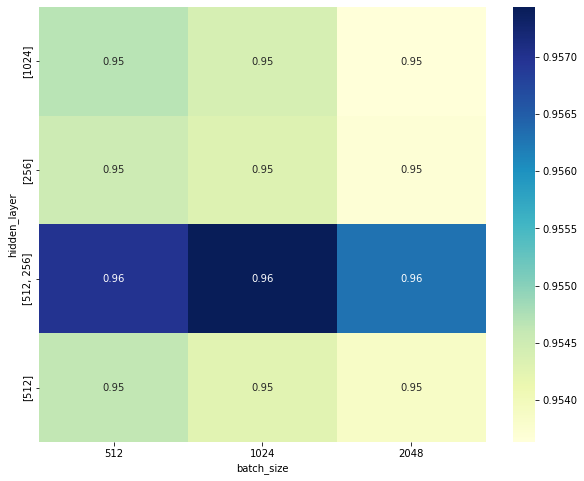

<IPython.core.display.Javascript object>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by your hyperparameters and take the mean of the scores.
grouped_df = (
    df_DRN_hyper_scores_1.groupby(["hidden_layer", "batch_size"]).mean().reset_index()
)


# Pivot your dataframe to create a 2D grid. Replace 'hyperparameter1' and 'hyperparameter2' with actual column names.
pivot_df = grouped_df.pivot("hidden_layer", "batch_size", "score")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True)
plt.show()

#### Run 2

In [66]:
df_DRN_hyper_split_2[0].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
2,0,[1024],10,2048,30,0.001,Adam,relu,0.402879
1,0,[1024],10,2048,20,0.001,Adam,relu,0.402974
0,0,[1024],10,2048,10,0.001,Adam,relu,0.403705


<IPython.core.display.Javascript object>

In [67]:
df_DRN_hyper_split_2[1].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
5,15,[1024],10,2048,30,0.001,Adam,relu,1.068440
4,15,[1024],10,2048,20,0.001,Adam,relu,1.068467
3,15,[1024],10,2048,10,0.001,Adam,relu,1.068864


<IPython.core.display.Javascript object>

In [68]:
df_DRN_hyper_split_2[2].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
7,30,[1024],10,2048,20,0.001,Adam,relu,1.381906
8,30,[1024],10,2048,30,0.001,Adam,relu,1.383234
6,30,[1024],10,2048,10,0.001,Adam,relu,1.383297


<IPython.core.display.Javascript object>

#### Run 3

In [26]:
df_DRN_hyper_split_3[0].sort_values("score")

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
2,0,"[64, 128, 256]",5,16384,30,0.001,Adam,relu,0.413649
1,0,"[64, 128, 256]",5,8192,30,0.001,Adam,relu,0.416769
0,0,"[64, 128, 256]",5,4096,30,0.001,Adam,relu,0.431964
3,0,"[64, 128, 256]",5,32768,30,0.001,Adam,relu,0.440305


<IPython.core.display.Javascript object>

In [24]:
df_DRN_hyper_split_3[1].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
6,15,"[64, 128, 256]",5,16384,30,0.001,Adam,relu,1.121147
7,15,"[64, 128, 256]",5,32768,30,0.001,Adam,relu,1.122047
4,15,"[64, 128, 256]",5,4096,30,0.001,Adam,relu,1.168410
5,15,"[64, 128, 256]",5,8192,30,0.001,Adam,relu,1.201807


<IPython.core.display.Javascript object>

In [25]:
df_DRN_hyper_split_3[2].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
11,30,"[64, 128, 256]",5,32768,30,0.001,Adam,relu,1.509228
10,30,"[64, 128, 256]",5,16384,30,0.001,Adam,relu,1.524663
9,30,"[64, 128, 256]",5,8192,30,0.001,Adam,relu,1.531829
8,30,"[64, 128, 256]",5,4096,30,0.001,Adam,relu,1.769241


<IPython.core.display.Javascript object>

#### Run 4 

In [35]:
df_DRN_hyper_scores_3

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
0,0,[1024],10,2048,30,0.001,Adam,relu,0.407738
1,15,[1024],10,2048,30,0.001,Adam,relu,1.140125
2,30,[1024],10,2048,30,0.001,Adam,relu,1.439201


<IPython.core.display.Javascript object>